# EV353 Problem Set 2 - Forces and Processes Driving Ocean Currents
## Part 2: Python Data Analysis

### Overview

The surface ocean’s heat, salt, and momentum budgets are the pathways for coupled ocean-atmosphere interactions that drive global climate variability. This problem set explores how the ocean’s velocity field balances the surface fluxes and contributes to the evolution of sea surface temperature (SST) and salinity over time.

In this problem set, you will demonstrate both your *qualitative and quantitative* understanding of the ocean's momentum budget and response to wind forcing. Your responses should incorporate the concepts covered in class and the assigned readings. Chapters 4-6 (6.1 & 6.2) in *Physical Oceanography and Climate* by Kris Karnauskas and this week’s scientific papers will be helpful references. 

**To foster a collaborative learning environment, you will complete this lab with a partner.** The pairings will be randomly determined in class and posted on Canvas. Each person is required to complete and contribute to all questions. This includes performing all calculations/analyses and writing your own code. *It is against the honor code to divide up the questions among different individuals or use generative AI/chatbots on any aspect this assignment. All answers must be written in your own words.*

### Learning Outcomes

After completing this assignment, you will be able to:
- Describe the forces and processes that drive ocean currents both mathematically and in plain language.
- Evaluate how the sea surface height gradient is used to calculate geostrophic currents.
- Apply the momentum budget equations to real-world observations.   
- Articulate the significance of the ocean’s response to wind forcing in the context of the broader global climate system.

### Assignment Structure

**Part 1** includes written responses and hand calculations. To receive full credit, you must show your work and explain your reasoning. **Part 2** includes data analysis exercises in Python. You will use this Jupyter Notebooks to manipulate and visualize geospatial datasets, perform calculations, and interpret the results.

---
### Data Sets 
To complete this lab, you will need the following data sets (posted on Canvas):

``aviso.nc`` AVISO Sea Surface Height (satellite product) 

*The high resolution file will display nicer maps, but a lower resolution file (1° horizontal resolution) is also available if your computer is short on space. Talk to Dr. Lawman if you have questions about this.*

---
### Assessment
Generating high-quality figures is an important part of science comunication! All figures must be properly formatted to receive full credit. This means including titles, axes labels (with units), and legends, as appropriate. The aspect ratio should be appropriate for the type of figure (i.e., the figures are not compressed or stretched). 

Please use the Python packages [cartopy](https://scitools.org.uk/cartopy/docs/latest/) and [cmocean colormaps for oceanography](https://matplotlib.org/cmocean/) when generating maps. Take care to use intuitive colormaps and colorbar levels for the type of data you are representing. 

The grading rubric for part 2 is provided at the end of the companion Word Document for this assignment.

In [1]:
# import Python packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import math

## Follow Geostrophic Currents to "Find Nemo" 

**Step 1:** Load the AVISO sea surface height data (0.25° latitude x 0.25° longitude global grid) and subset the data to January 1993 to December 2010. Then generate a map of the time averaged sea surface height ($\eta$). Describe your general observations in your write-up for the problem set.

**Step 2:** Generate a global map showing the Coriolis frequency. The angular velocity of Earth ($\Omega$) is 7.292 x 10$^{-5}$ radians/second. Comapre and contrast the values at the equator versus the mid- and high-latitudes in your lab write-up. Does your map make sense? 

**Tips:**
- There is a variable in the AVISO dataset called `lat_grid` that has repeated latitude values at every longitude. This will be helpful for calculating the Coriolis frequency at every lat/lon gridpoint.
- The latitude values are provided in degrees. Remember to convert from degrees to radians when using the Numpy sine method `np.sin()`.

**Step 3:** Calculate the time averaged geostrophic velocity (units: m/s) and produce global maps of $u_g$, $v_g$, and the scalar geostrophic speed $\sqrt{u_g^2 + v_g^2}$. Include titles, axes labels (with units), and intuitive colorbars that are scaled appropriately for the data. 

**Tips:** 
- Calculate the spatial sea surface height gradients using Xarray's `da.differentiate()` method where `da` is a 2-dimensional data array. Provide the dimension you want to calculate the gradient over inside the parentheses.
- The denominator of $\partial \eta$/$\partial x$ and $\partial \eta$/$\partial y$ requires knowing the distance between grid points. The distance covered by 1° of latitude is approximately 111 km (111,000 m). The distance covered by 1° of longitude depends on the latitude (think about how much larger the circumference of the Earth is at the equator versus at 80°N)
- To calculate the geostrophic current velocity in m/s, divide your $u_g$ value by `(2*0.25*111000)` 
- Divide $v_g$ by `(2*0.25*111000*np.cos(np.deg2rad(lat_grid)))` where `lat_grid` is converted to radians before calculating the sine.

**Step 4:** Zoom into the ocean region to the east of Australia, by generating 3 regional maps. This can be done by setting the map extent. 

**Step 5:** Save your figures and add them to your write-up. Interpret your figures and answer the accompanying questions in the Word document for the problem set.

### Canvas Submission

Work closely with your partner to ensure your answers reflect your joint understanding of the material. 

**To submit your lab:**
1. Re-run the whole Notebook and check there are no errors
2. Submit your Jupyter Notebook (LastName_FirstName_EV353_PS2.ipynb) on Canvas (1 submission per person).
3. Compile your group's written responses and all the figures you generated in a separate Word or Google document. Export the document as a PDF and upload it to Canvas (1 submission per group).

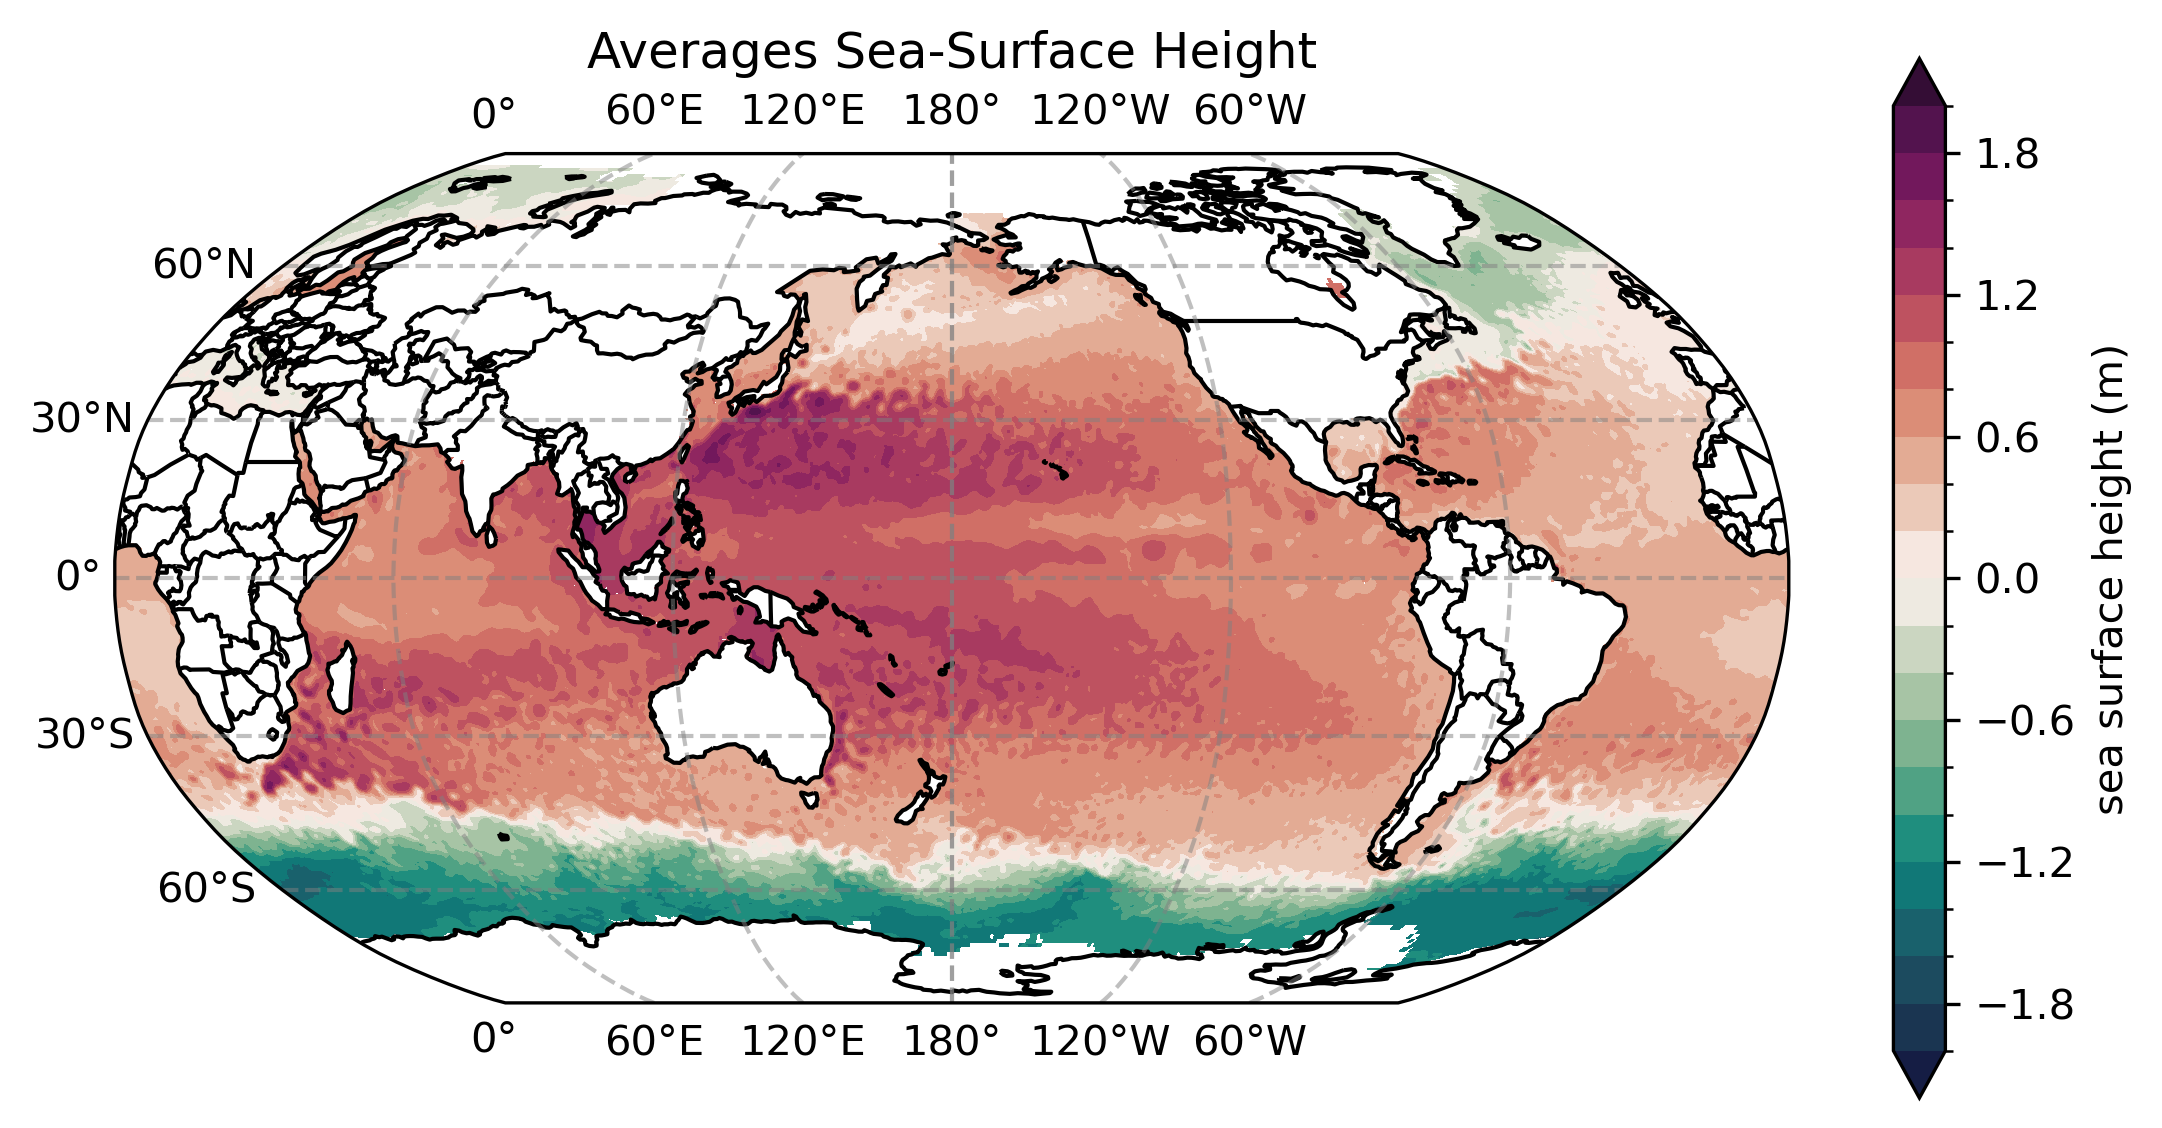

In [2]:
filePath = '/Users/a_rust/Documents/EV353_Oceanography/aviso.nc'
ds = xr.open_dataset(filePath)

# display dataset
ds = ds.sel(time=slice('1993.000000', '2010.916667'))
ds

# pull ssh and find mean
ssh = ds['ssh'].mean(dim='time')

#plot ssh averaged
#plot
# map projection
proj = ccrs.Robinson(central_longitude=180)
cmap = cmocean.cm.curl
lev = np.arange(-2.0, 2.20, 0.2)

fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

# 
ssh.plot.contourf(
    x='lon',
    y='lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    cmap=cmap,
    cbar_kwargs={'label': "sea surface height (m)"}
    
 
)
# add coastlines
ax.add_feature(cfeature.BORDERS, linestyle ='None')
ax.coastlines(resolution='110m') 
ax.gridlines(crs = ccrs.PlateCarree(),
             draw_labels = True,
             linewidth = 1,
             color = 'gray',
             alpha = 0.5,
             linestyle = '--')

# add title
ax.set_title("Averages Sea-Surface Height")
fig.savefig('Averages Sea-Surface Height.png', facecolor = 'white', transparent = False, bbox_inches ='tight')

Examine the time-averaged sea surface height field

3. Broadly, where in the world ocean is () relatively high and relatively low?
SSH is generally high at the mid/low latitudes and low at the poles. It's also higher where we know SST are generally higher in the Western Pacific and lower in the Pacific cold tongue. Also, where we know there are strong western boundary currents there is higher SSH.


5. Where are there particularly strong horizontal gradients of ()?
Over the Pacific basin, going from west to east pressure decreases. Additionally, from the poles to the equator there is an increase in SSH.

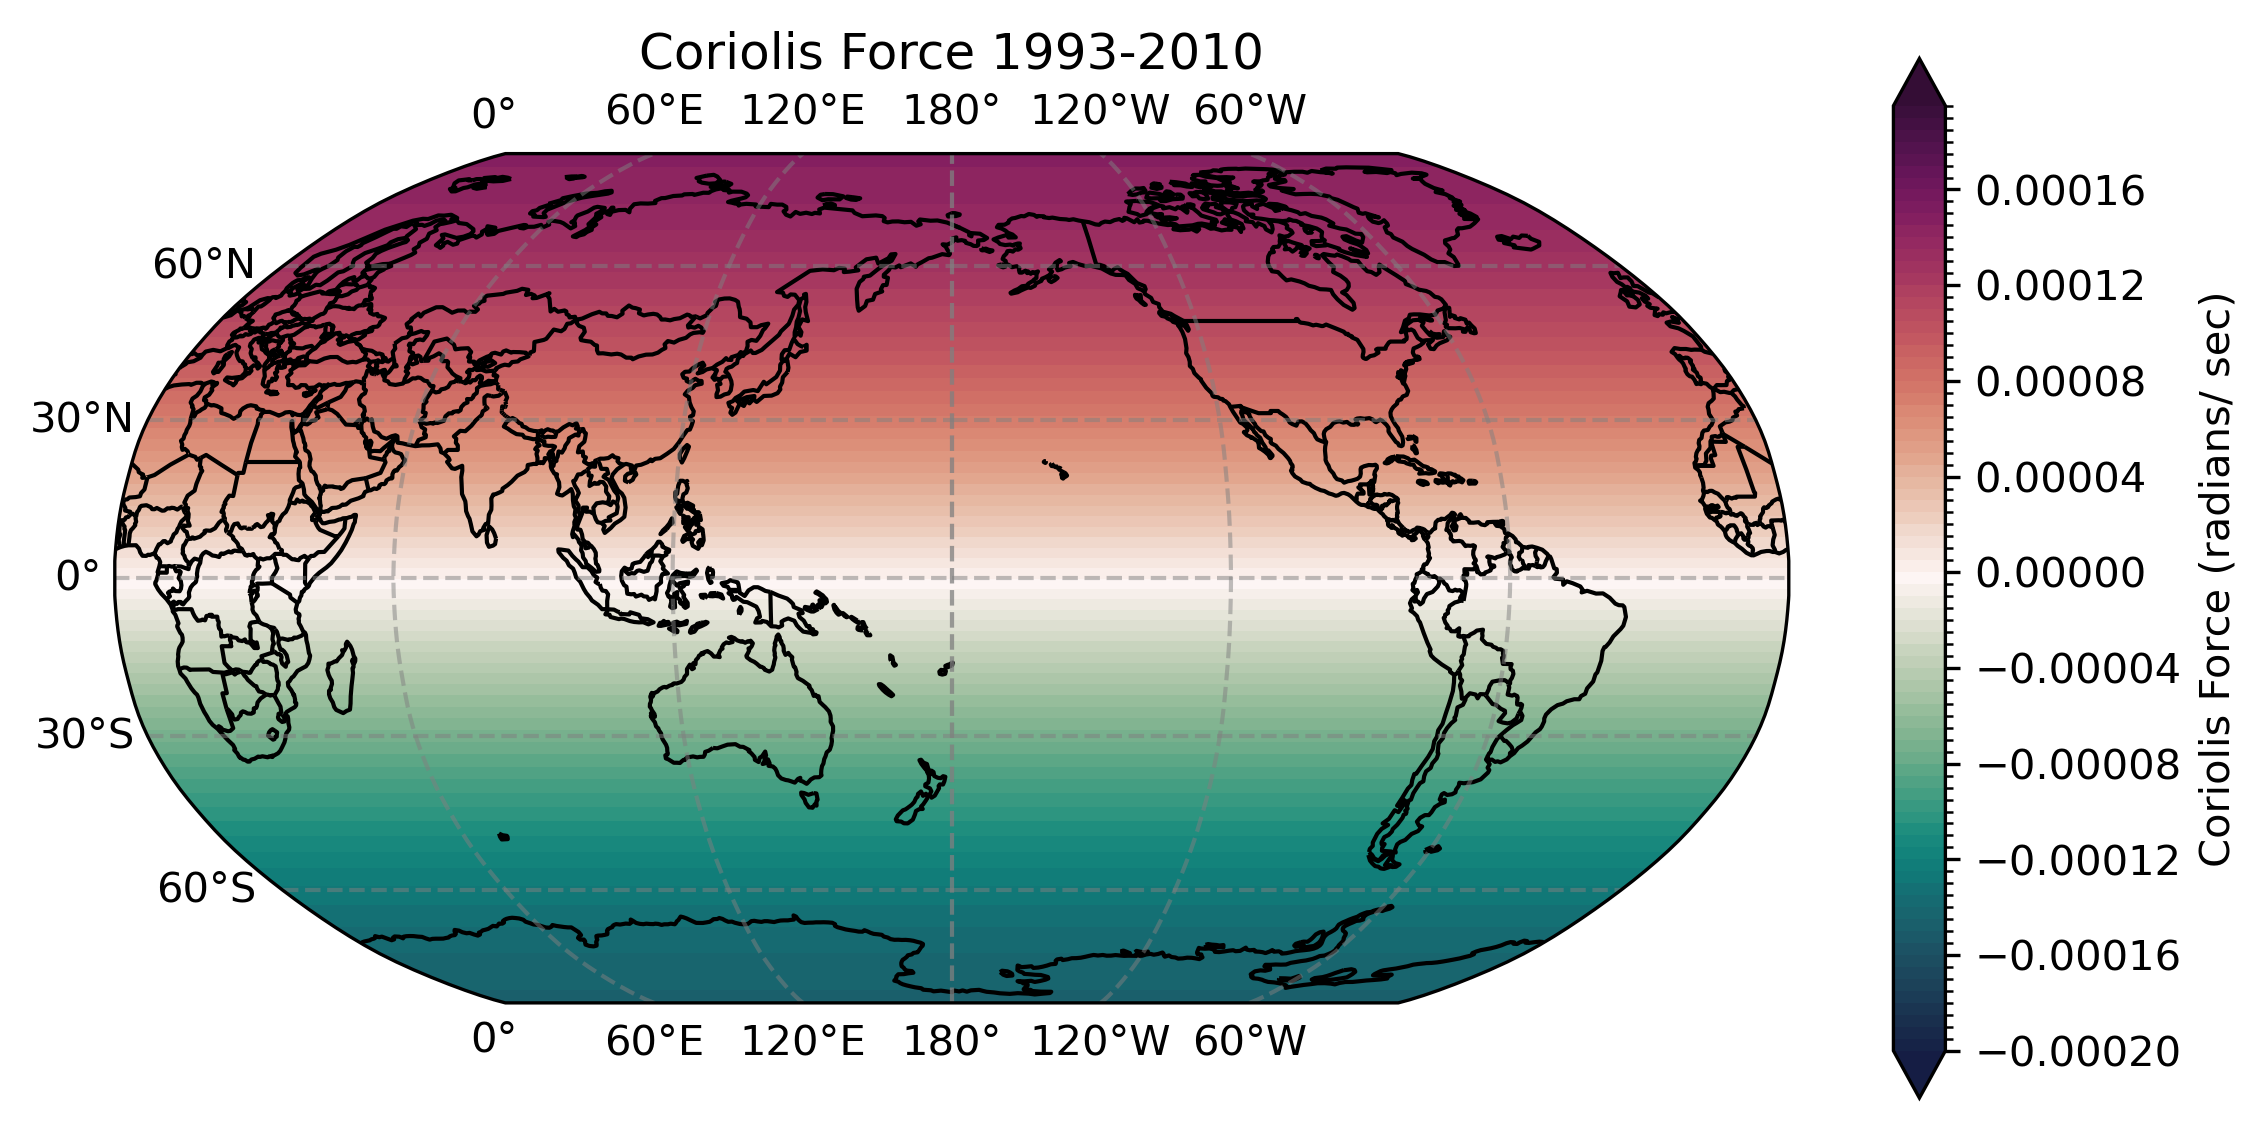

In [3]:
g = 9.81
da = ssh
lon = ds.lon
lat = ds.lat
lat_grid = ds['lat_grid']

f = 2*(0.00007292)*np.sin(lat_grid*(math.pi/180))

proj = ccrs.Robinson(central_longitude=180)
cmap = cmocean.cm.curl
lev = np.arange(-0.0002, 0.0002, 0.000005)

fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

# filled contour map of DataArray
f.plot.contourf(
    x='lon',
    y='lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    cmap=cmap,
    cbar_kwargs={'label': "Coriolis Force (radians/ sec)"}
    
 
)
# add coastlines
ax.add_feature(cfeature.BORDERS, linestyle ='None')
ax.coastlines(resolution='110m') 
ax.gridlines(crs = ccrs.PlateCarree(),
             draw_labels = True,
             linewidth = 1,
             color = 'gray',
             alpha = 0.5,
             linestyle = '--')

# add title
ax.set_title("Coriolis Force 1993-2010")
fig.savefig('Coriolis Force 1993-2010.png', facecolor = 'white', transparent = False, bbox_inches ='tight')

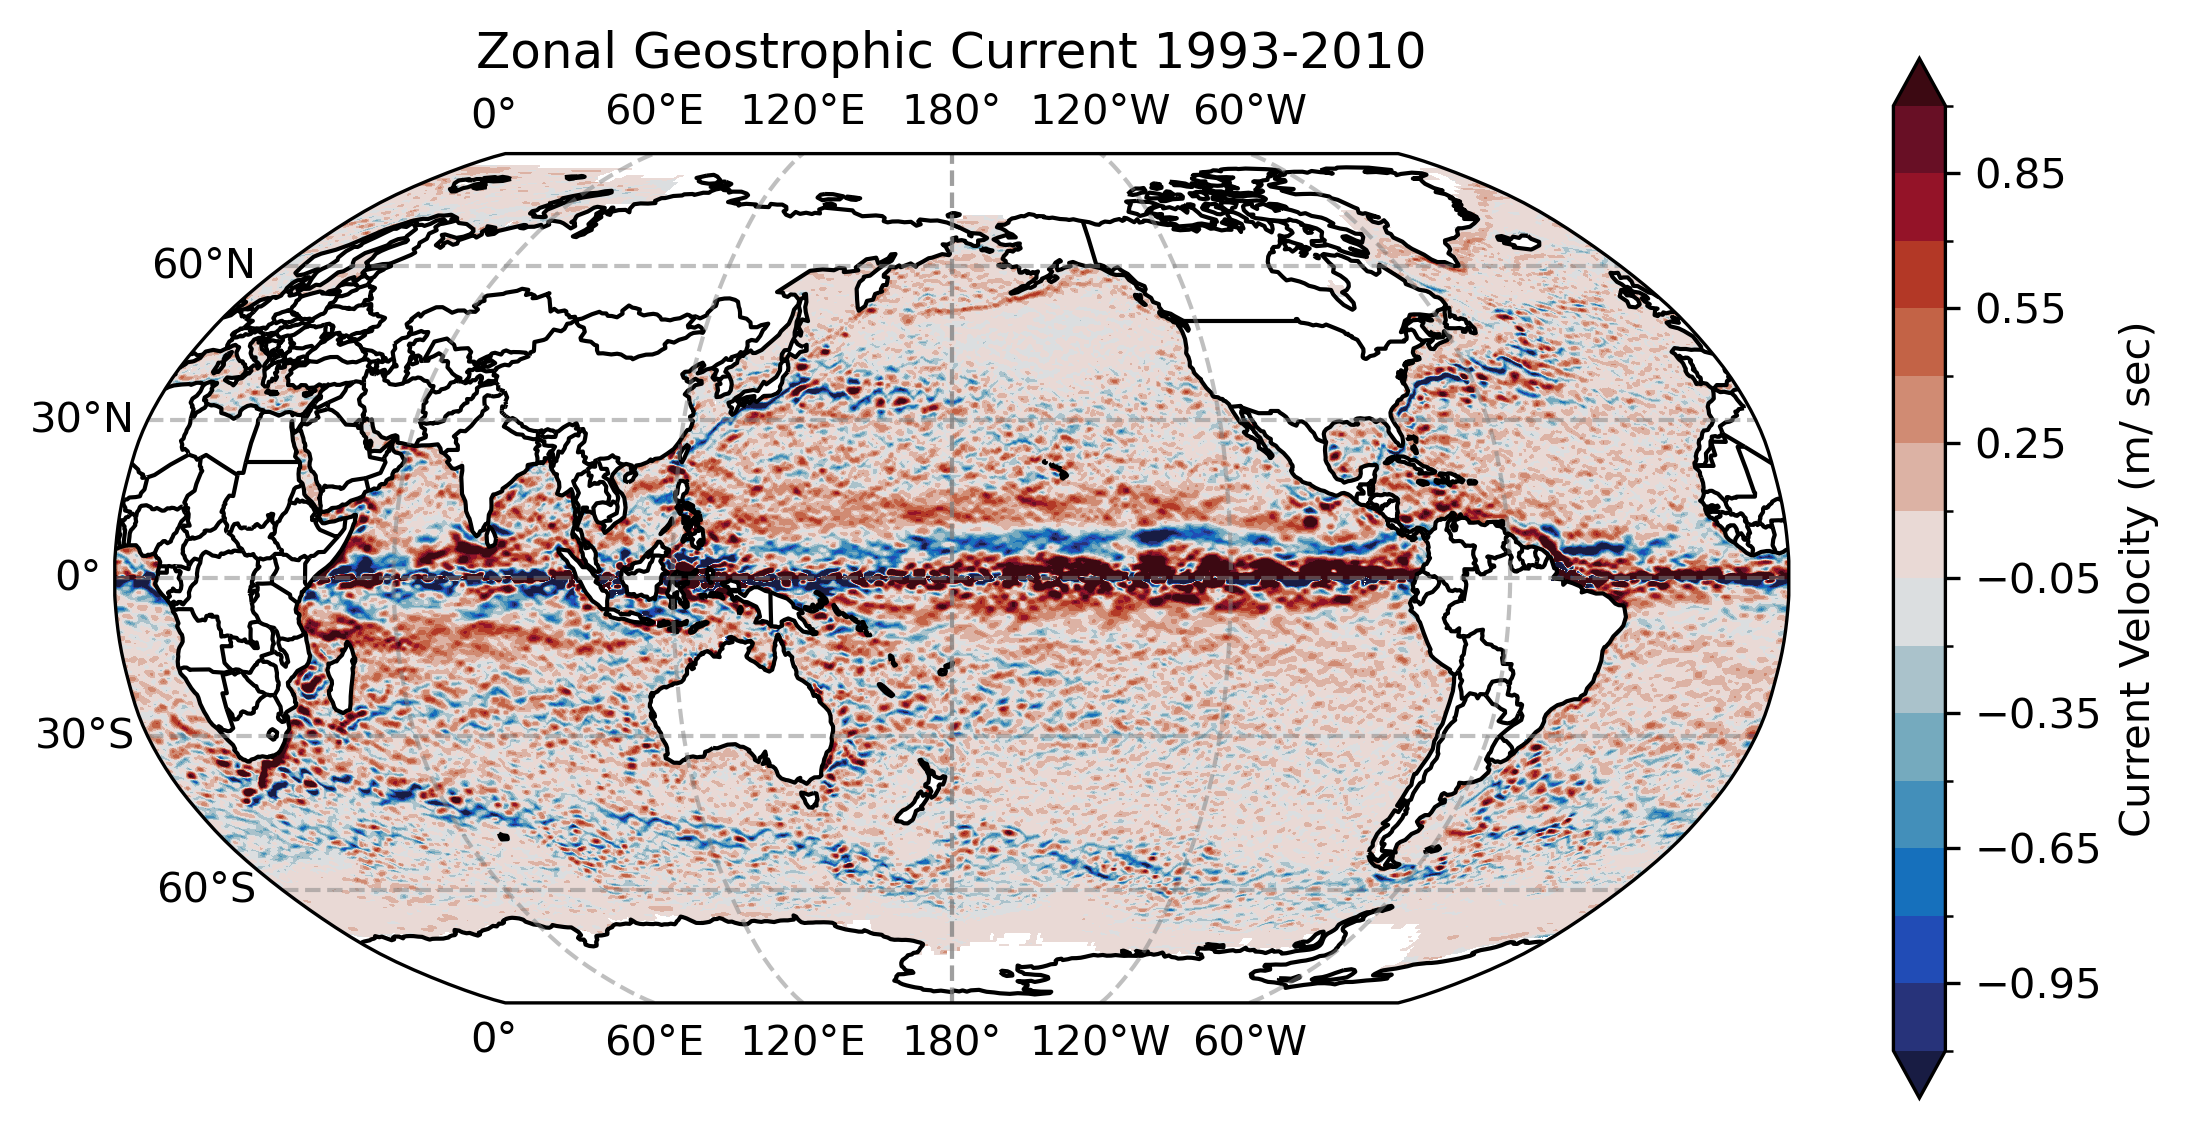

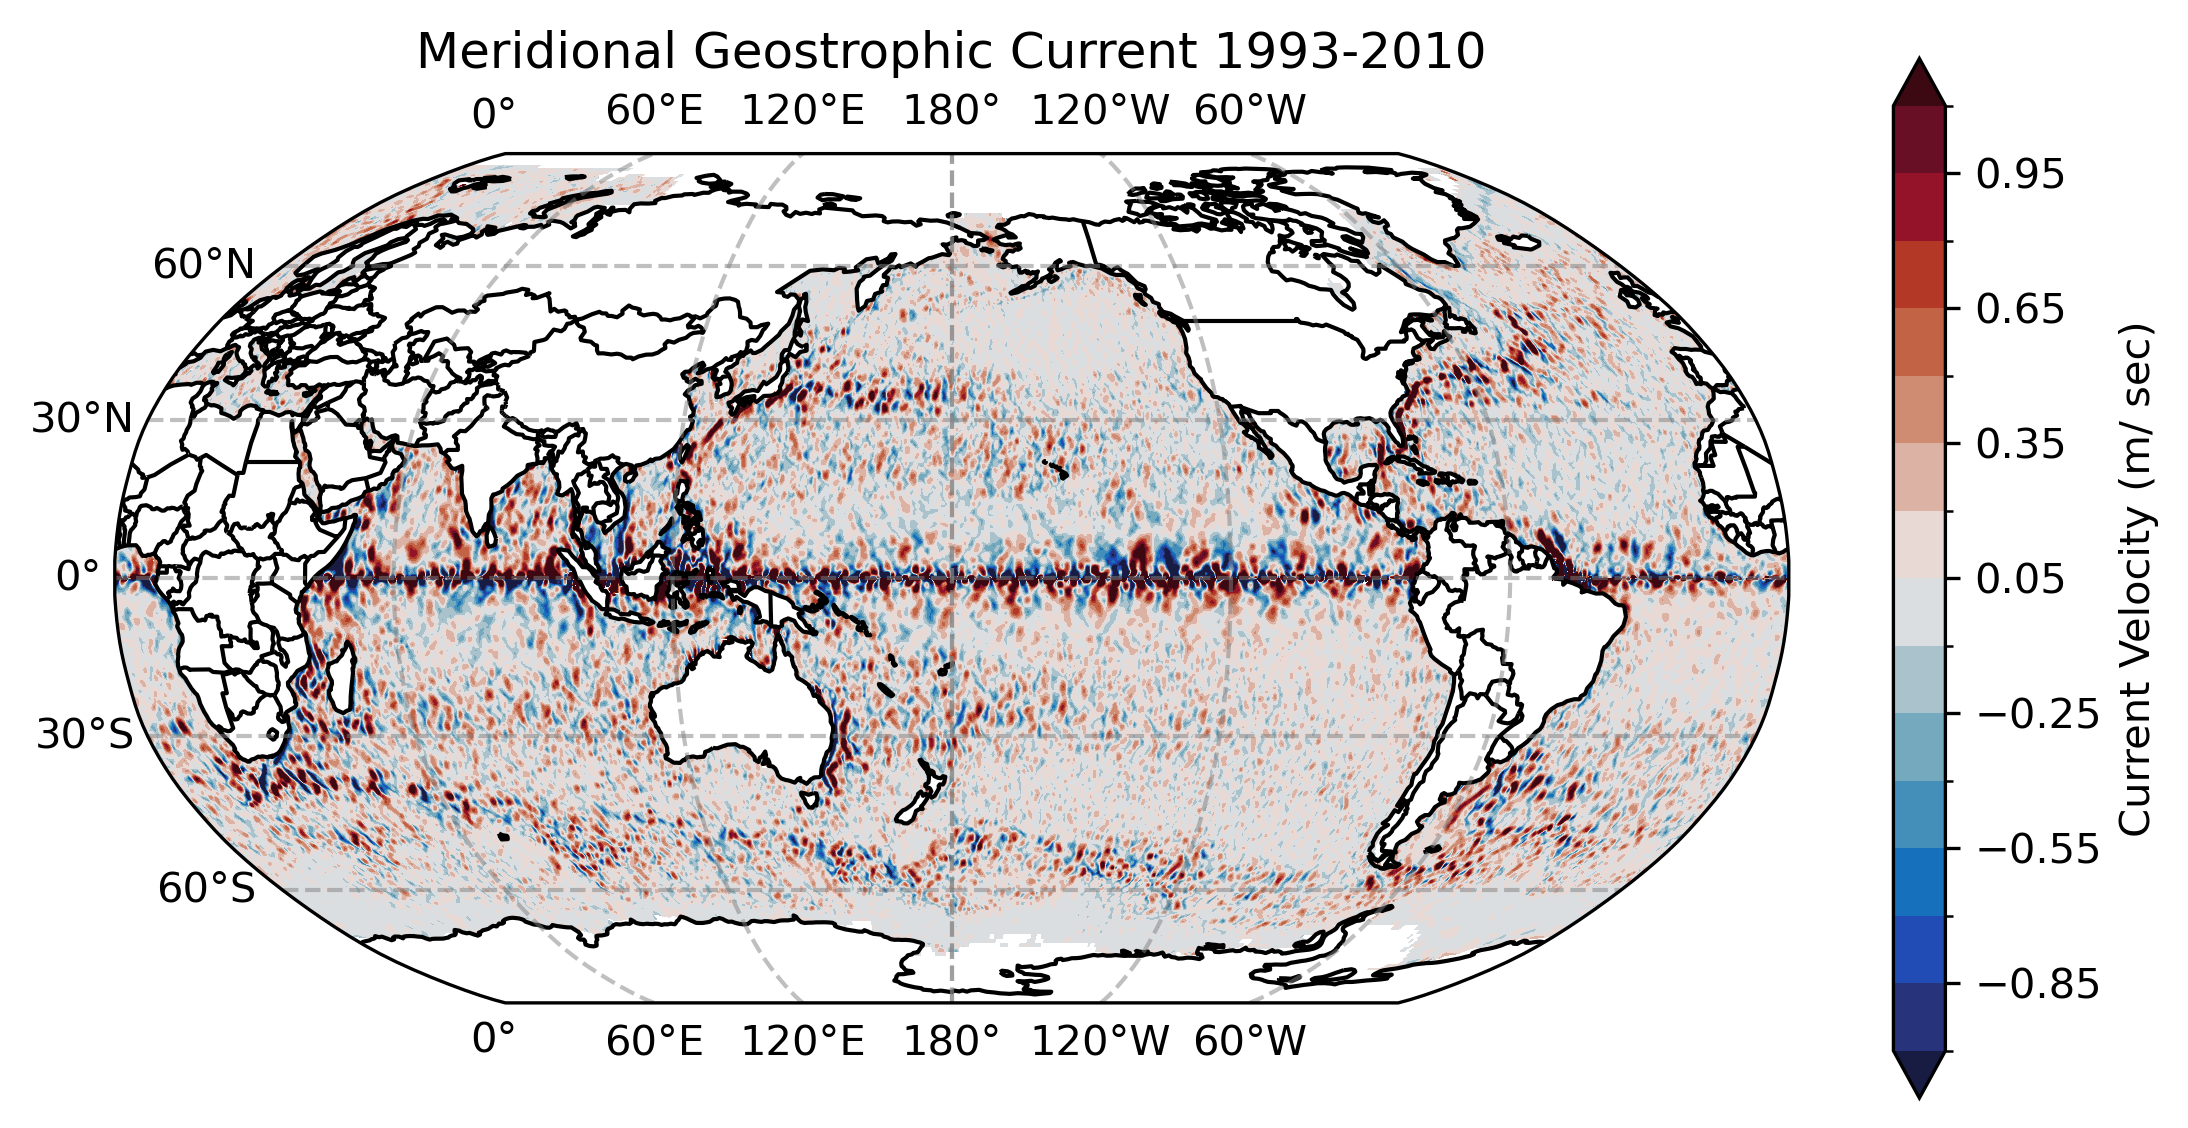

In [4]:
g = 9.81
da = ssh
lon = ds.lon
lat = ds.lat
lat_grid = ds['lat_grid']

del_etay = da.differentiate('lat')
del_etax = da.differentiate('lon')

# time averaged geostrophic velocity 
Ug = (g/f) * (del_etay/ (2*0.25*111000))
Vg = (g/f) * (del_etax/ (2*0.25*111000*np.cos(np.deg2rad(lat_grid))))


proj = ccrs.Robinson(central_longitude=180)
cmap = cmocean.cm.balance
lev = np.arange(-1.1, 1.15, 0.15)

fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

#UG Filled map
Ug.plot.contourf(
    x='lon',
    y='lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    cmap=cmap,
    cbar_kwargs={'label': "Current Velocity (m/ sec)"}
    
)
# add coastlines
ax.add_feature(cfeature.BORDERS, linestyle ='None')
ax.coastlines(resolution='110m') 
ax.gridlines(crs = ccrs.PlateCarree(),
             draw_labels = True,
             linewidth = 1,
             color = 'gray',
             alpha = 0.5,
             linestyle = '--')

# add title
ax.set_title("Zonal Geostrophic Current 1993-2010")
fig.savefig('Zonal Geostrophic Current 1993-2010.png', facecolor = 'white', transparent = False, bbox_inches ='tight')\

proj = ccrs.Robinson(central_longitude=180)
cmap = cmocean.cm.balance
lev = np.arange(-1, 1.15, 0.15)

fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

#VG Filled map 
Vg.plot.contourf(
    x='lon',
    y='lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    cmap=cmap,
    cbar_kwargs={'label': "Current Velocity (m/ sec)"}
     
)
ax.gridlines(crs = ccrs.PlateCarree(),
             draw_labels = True,
             linewidth = 1,
             color = 'gray',
             alpha = 0.5,
             linestyle = '--')
# add coastlines
ax.add_feature(cfeature.BORDERS, linestyle ='None')
ax.coastlines(resolution='110m') 

# add title
ax.set_title("Meridional Geostrophic Current 1993-2010")
fig.savefig('Meridional Geostrophic Current 1993-2010.png', facecolor = 'white', transparent = False, bbox_inches ='tight')



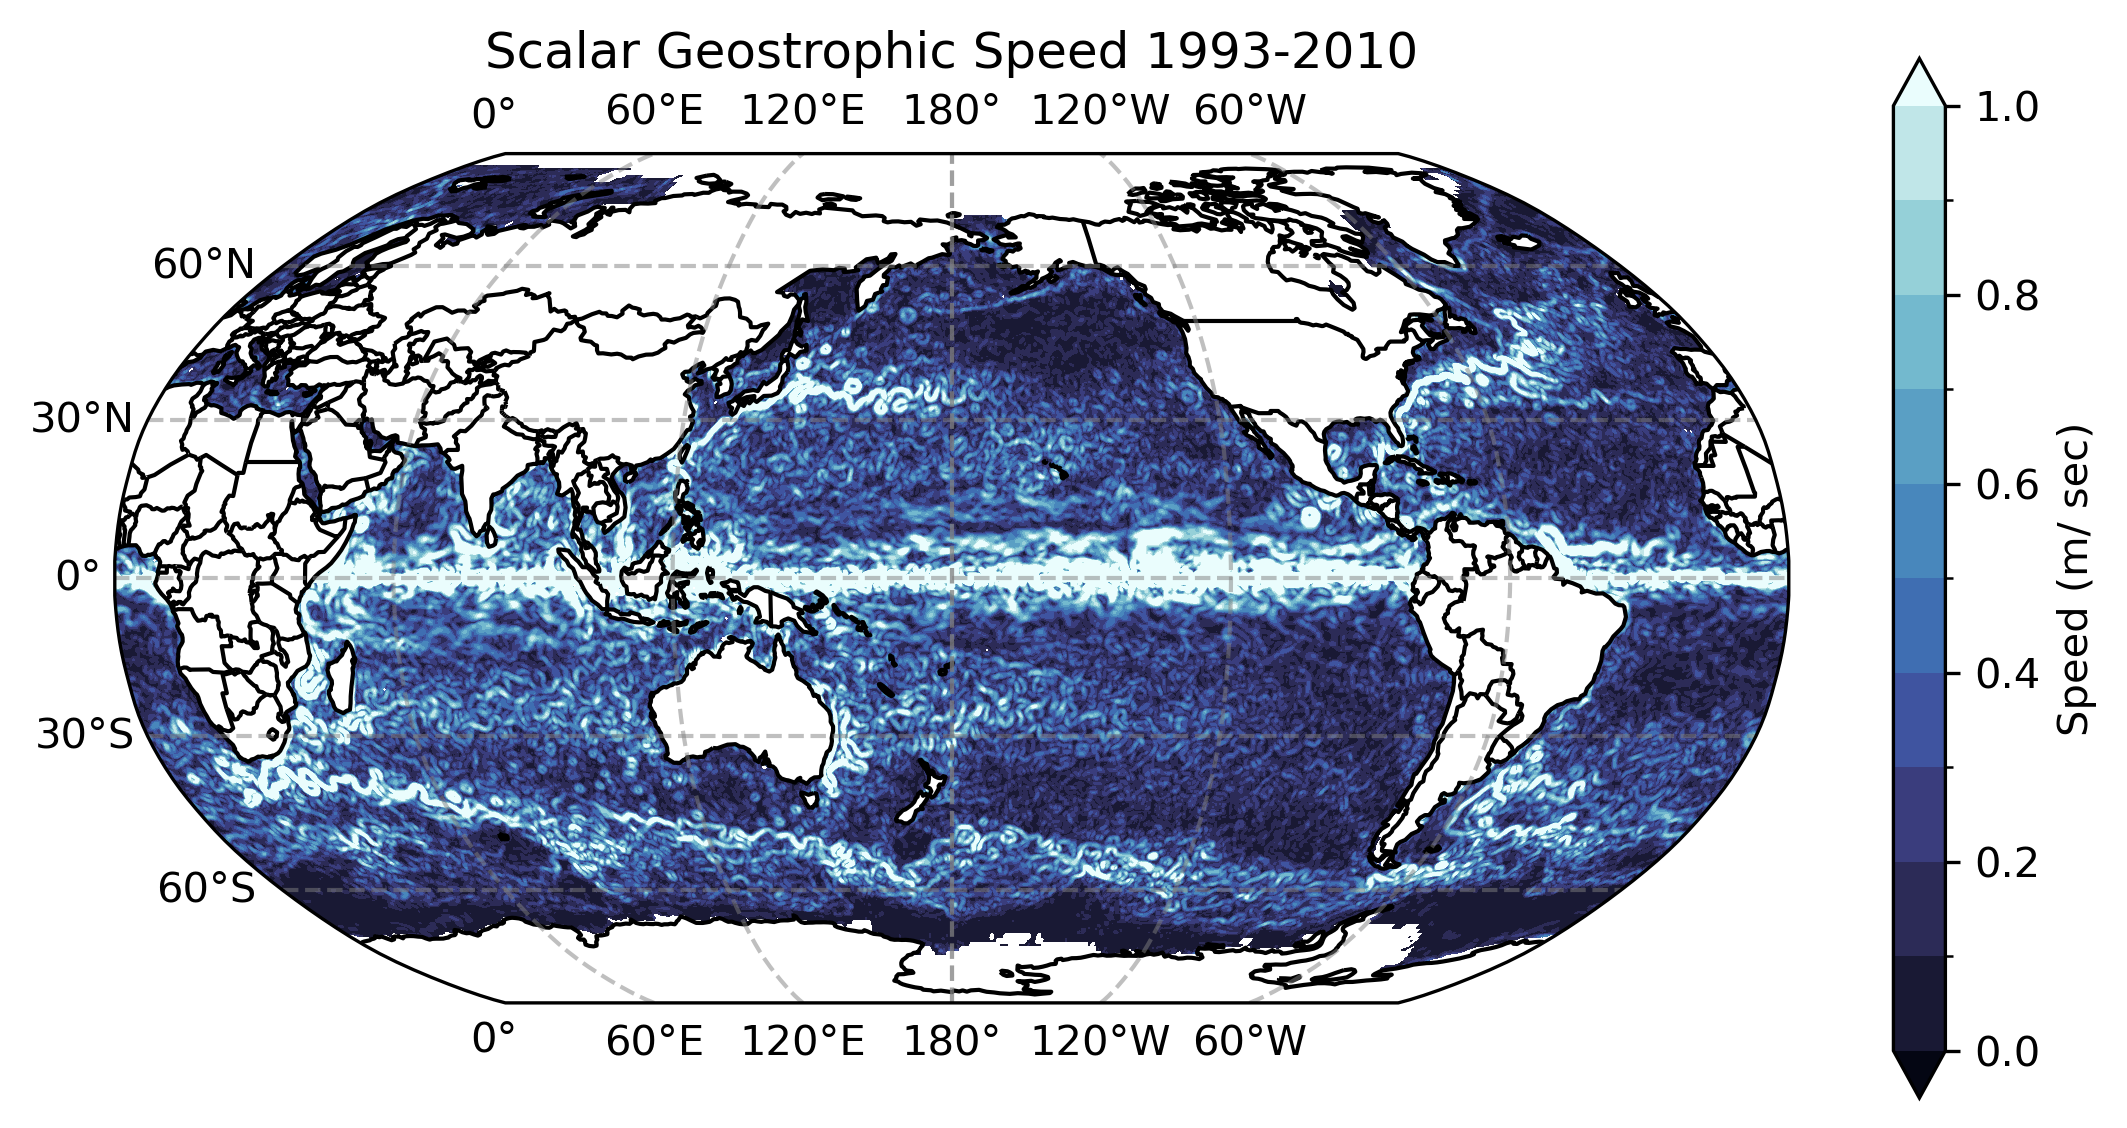

In [6]:
#scalar geostrophic speed 
sgs = np.sqrt((Ug**2) + (Vg**2))

proj = ccrs.Robinson(central_longitude=180)
cmap = cmocean.cm.ice
lev = np.arange(0, 1.10, 0.1)

fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

#SGS 
sgs.plot.contourf(
    x='lon',
    y='lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    cmap=cmap,
    cbar_kwargs={'label': "Speed (m/ sec)"}
     
)
# add coastlines
ax.add_feature(cfeature.BORDERS, linestyle ='None')
ax.coastlines(resolution='110m') 
ax.gridlines(crs = ccrs.PlateCarree(),
             draw_labels = True,
             linewidth = 1,
             color = 'gray',
             alpha = 0.5,
             linestyle = '--')

# add title
ax.set_title("Scalar Geostrophic Speed 1993-2010")
fig.savefig('Scalar Geostrophic Speed 1993-2010.png', facecolor = 'white', transparent = False, bbox_inches ='tight')


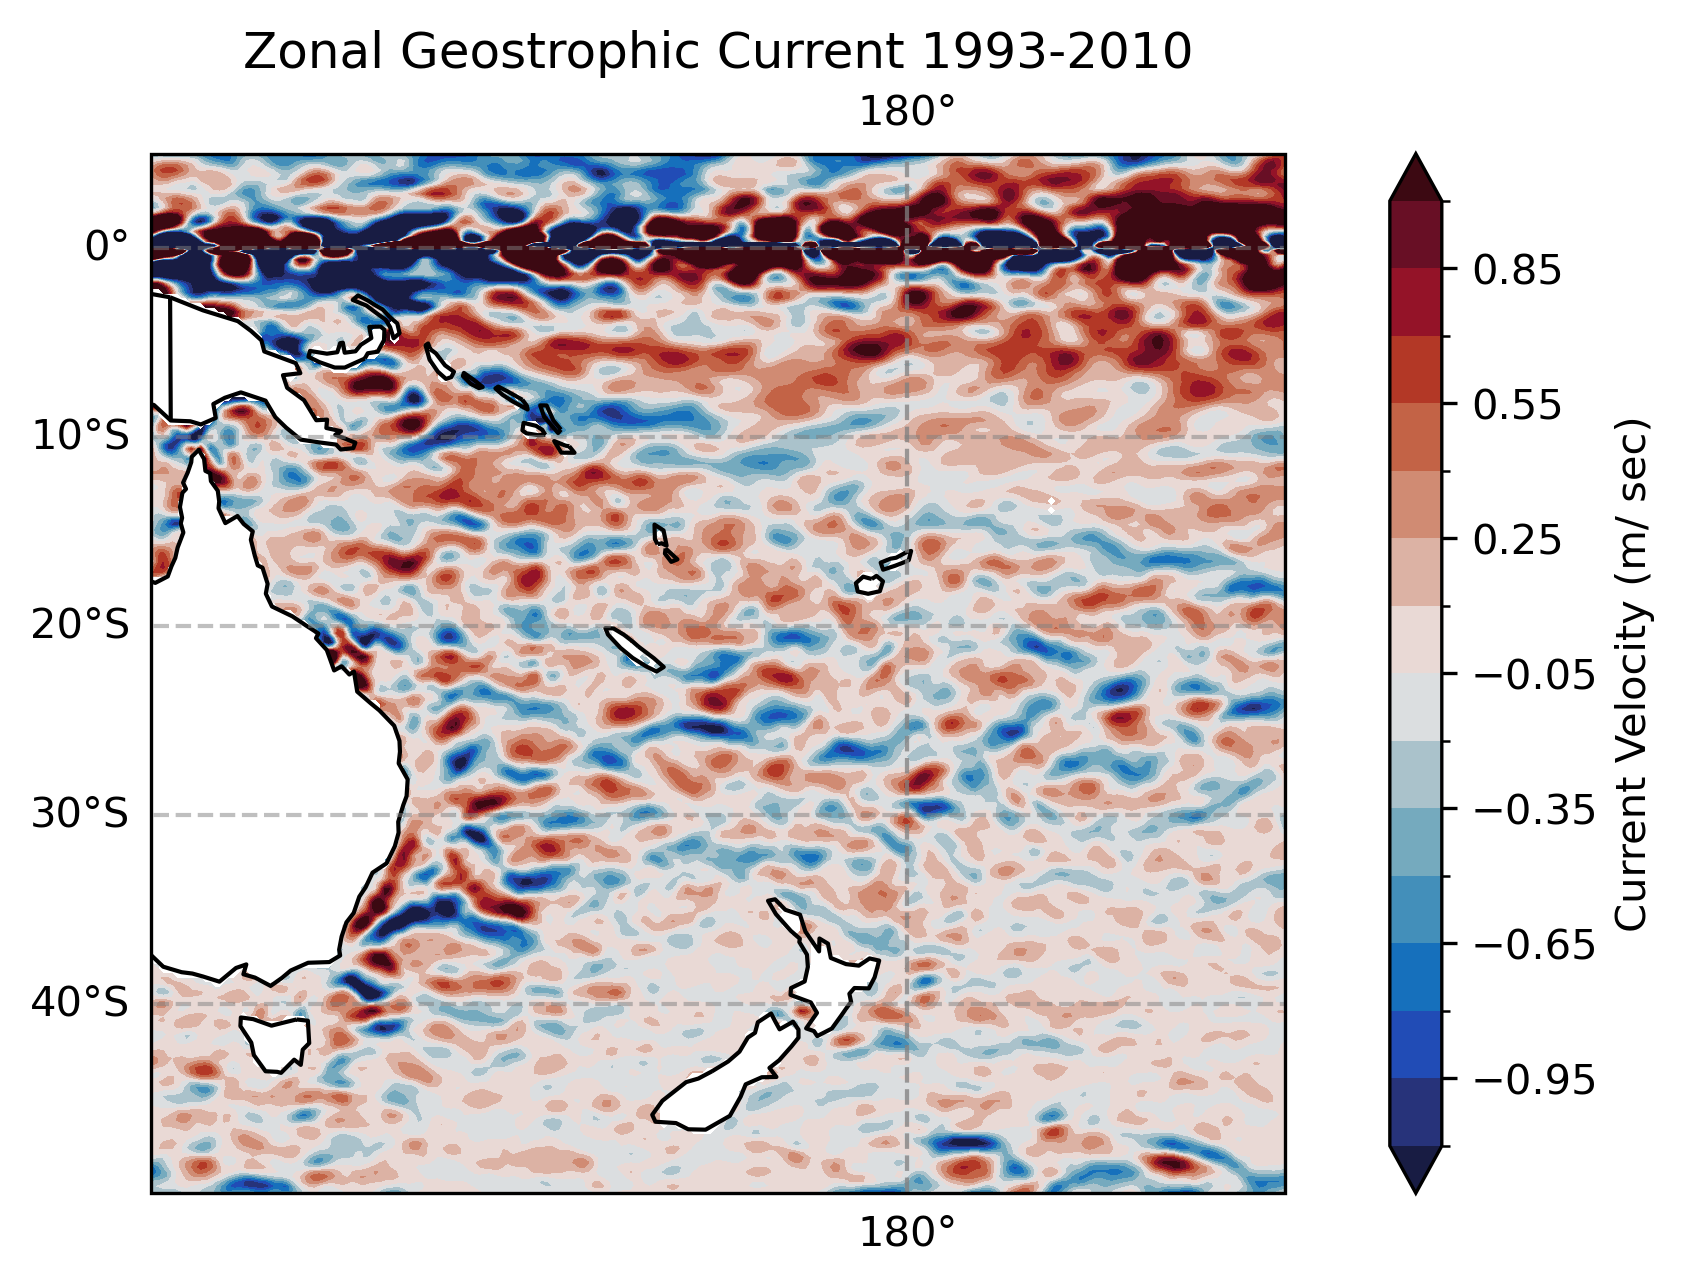

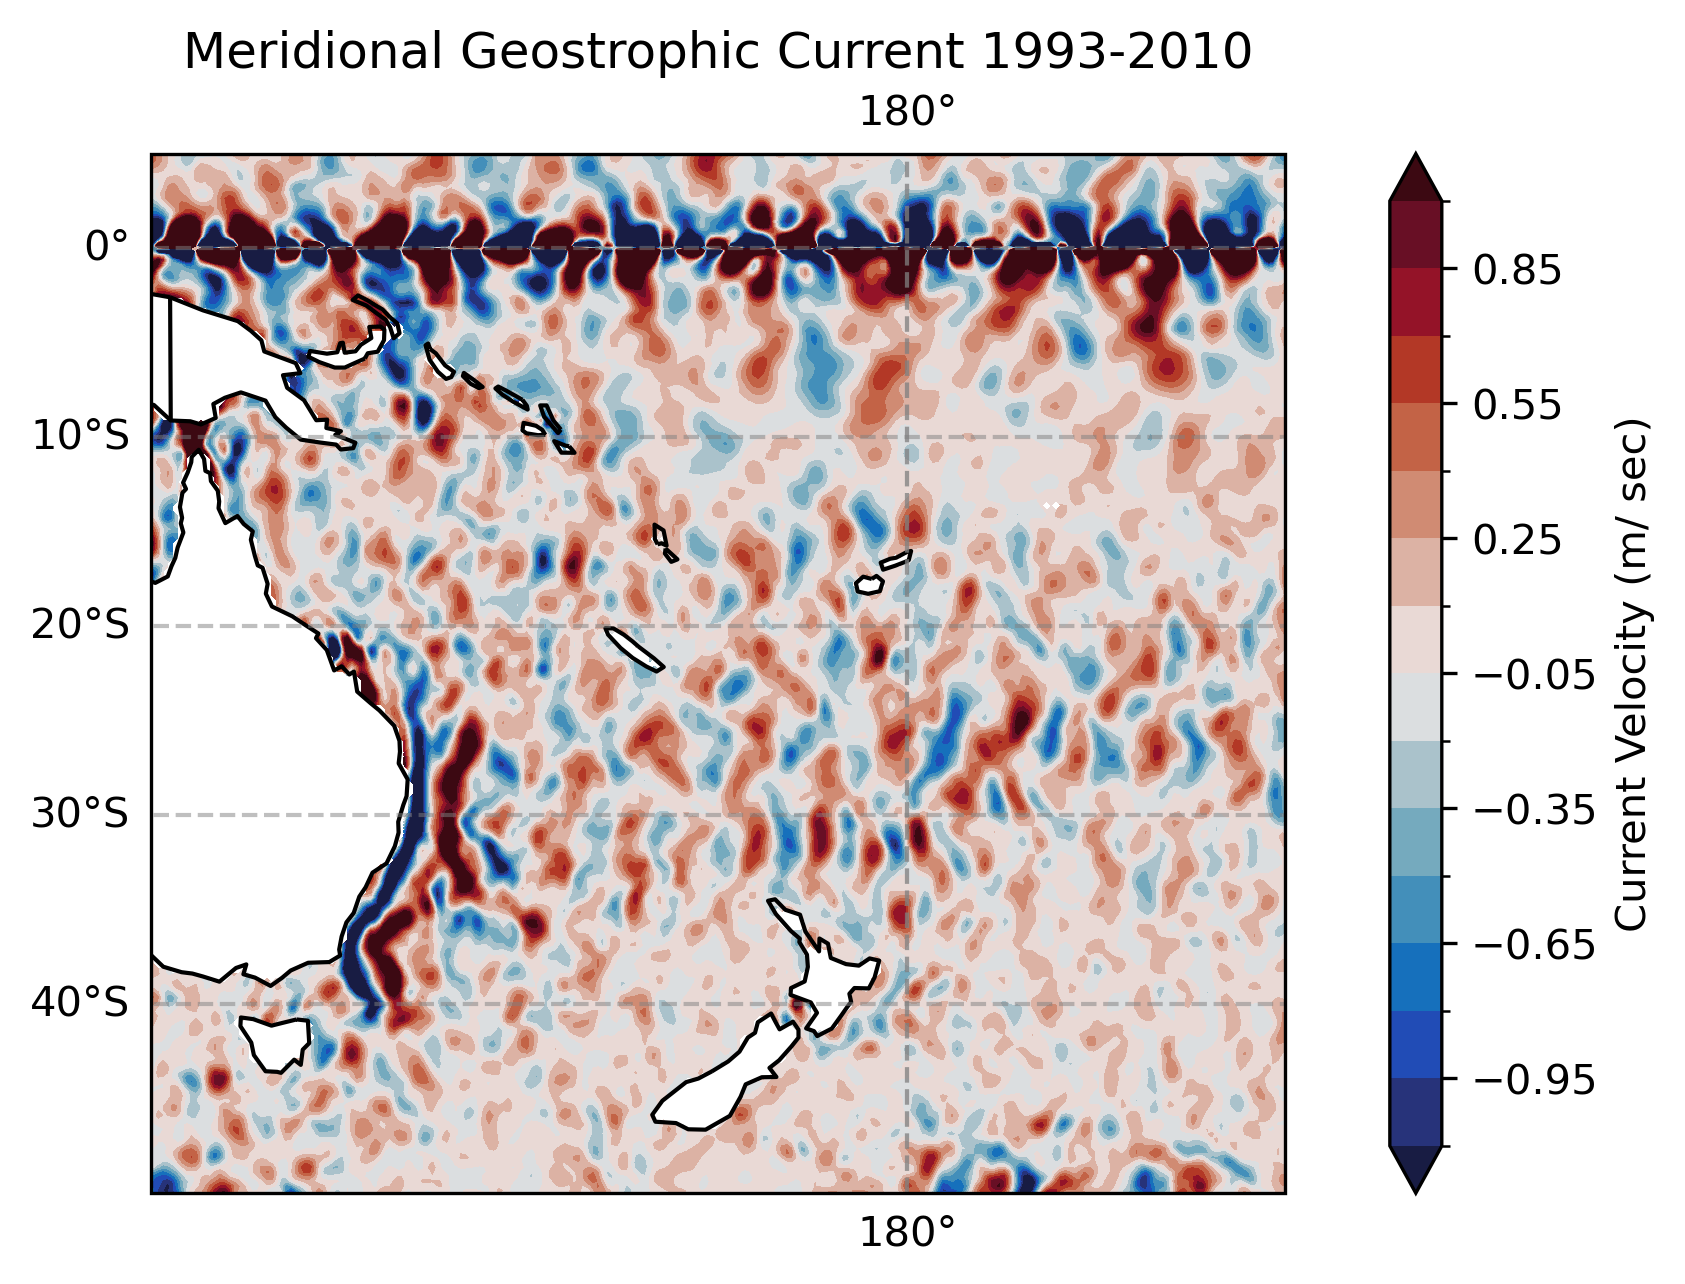

In [7]:
proj = ccrs.PlateCarree(central_longitude=180)
cmap = cmocean.cm.balance
lev = np.arange(-1.1, 1.15, 0.15)

fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)
ax.set_extent([140, 200, -50, 5], crs=ccrs.PlateCarree())

#UG Filled map
Ug.plot.contourf(
    x='lon',
    y='lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    cmap=cmap,
    cbar_kwargs={'label': "Current Velocity (m/ sec)"}
    
)
# add coastlines
ax.add_feature(cfeature.BORDERS, linestyle ='None')
ax.coastlines(resolution='110m') 
ax.gridlines(crs = ccrs.PlateCarree(),
             draw_labels = True,
             linewidth = 1,
             color = 'gray',
             alpha = 0.5,
             linestyle = '--')

# add title
ax.set_title("Zonal Geostrophic Current 1993-2010")
fig.savefig('Zonal Geostrophic Current 1993-2010 smaller.png', facecolor = 'white', transparent = False, bbox_inches ='tight')

proj = ccrs.PlateCarree(central_longitude=180)
cmap = cmocean.cm.balance
lev = np.arange(-1.1, 1.15, 0.15)

fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)
ax.set_extent([140, 200, -50, 5], crs=ccrs.PlateCarree())

#VG Filled map 
Vg.plot.contourf(
    x='lon',
    y='lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    cmap=cmap,
    cbar_kwargs={'label': "Current Velocity (m/ sec)"}
     
)
ax.gridlines(crs = ccrs.PlateCarree(),
             draw_labels = True,
             linewidth = 1,
             color = 'gray',
             alpha = 0.5,
             linestyle = '--')
# add coastlines
ax.add_feature(cfeature.BORDERS, linestyle ='None')
ax.coastlines(resolution='110m') 

# add title
ax.set_title("Meridional Geostrophic Current 1993-2010")
fig.savefig('Meridional Geostrophic Current 1993-2010 smaller.png', facecolor = 'white', transparent = False, bbox_inches ='tight')




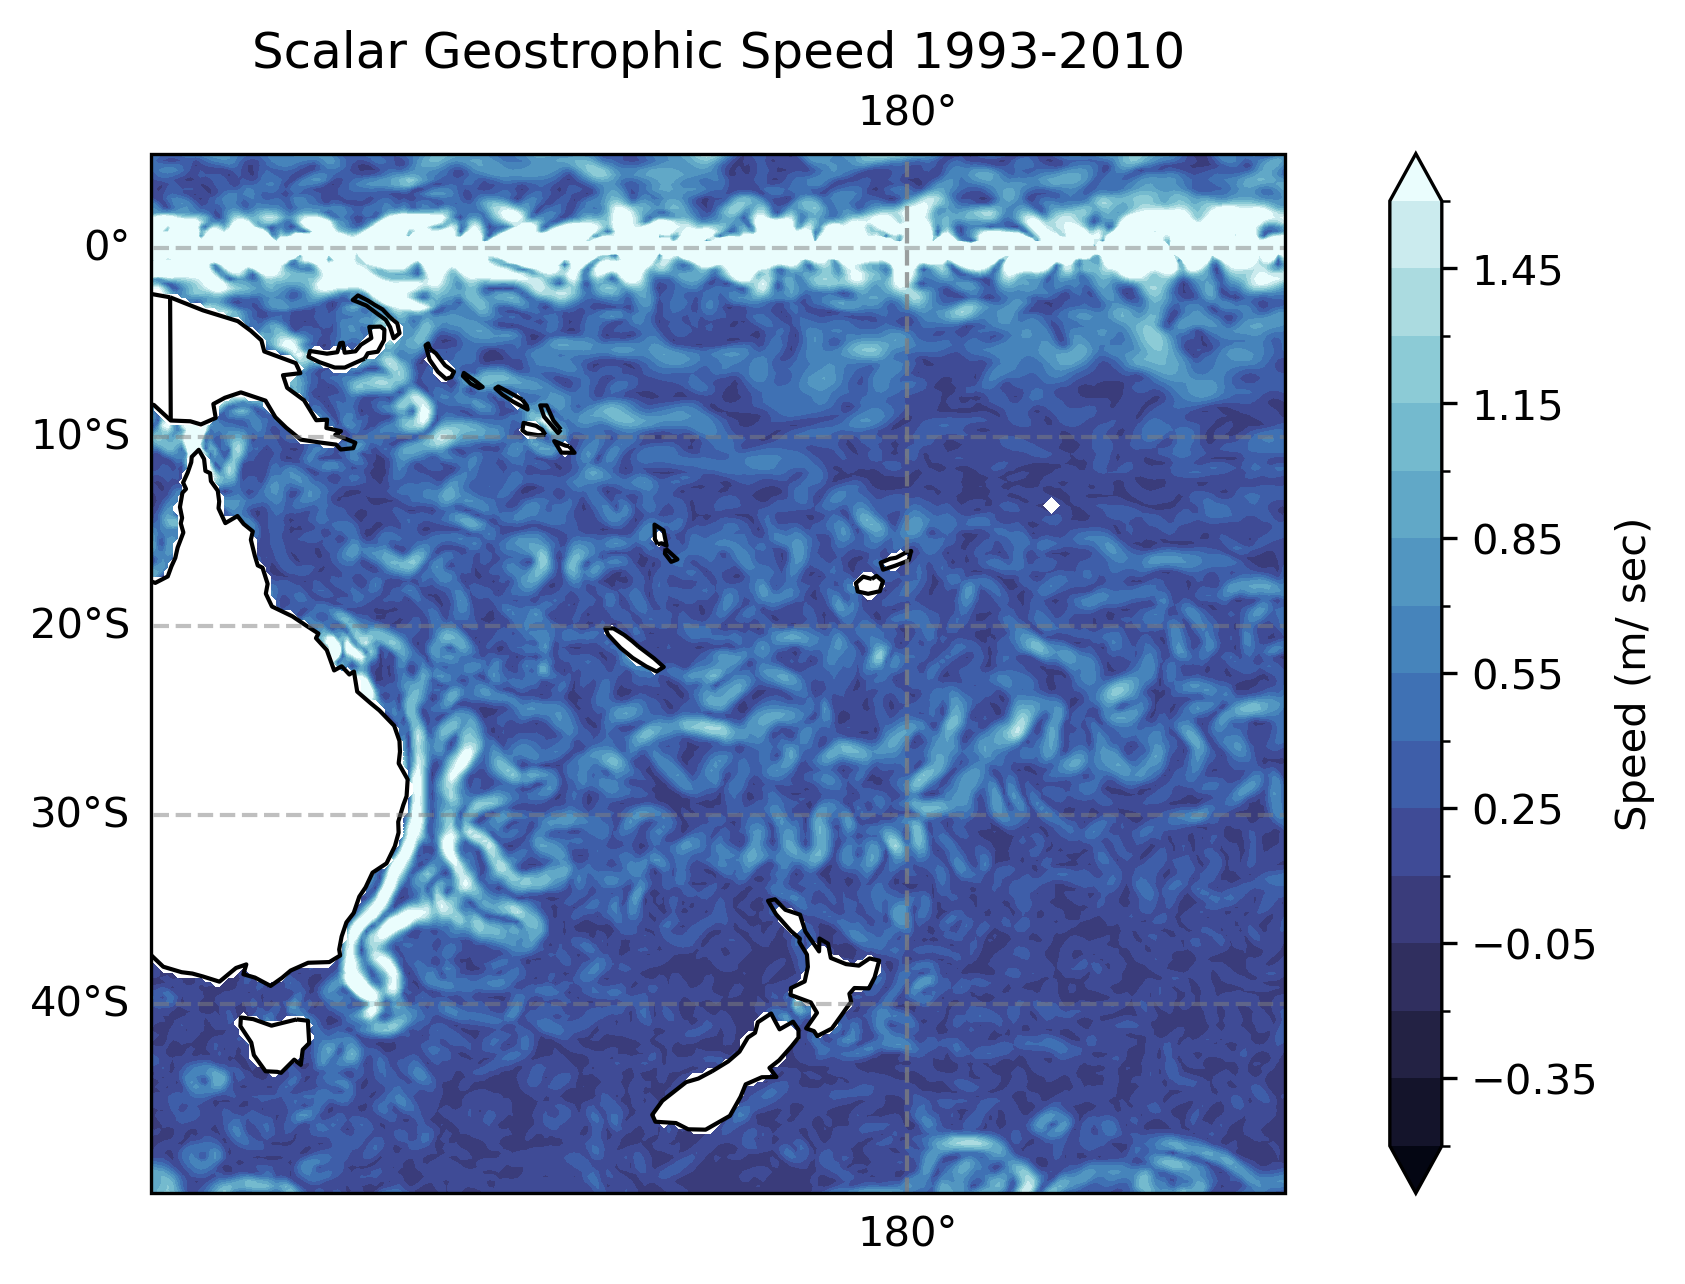

In [8]:
proj = ccrs.PlateCarree(central_longitude=180)
cmap = cmocean.cm.ice
lev = np.arange(-0.5, 1.65, 0.15)

fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

#Regional Maps
ax.set_extent([140, 200, -50, 5], crs=ccrs.PlateCarree())

#SGS 
sgs.plot.contourf(
    x='lon',
    y='lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    cmap=cmap,
    cbar_kwargs={'label': "Speed (m/ sec)"}
     
)
ax.gridlines(crs = ccrs.PlateCarree(),
             draw_labels = True,
             linewidth = 1,
             color = 'gray',
             alpha = 0.5,
             linestyle = '--')
# add coastlines
ax.add_feature(cfeature.BORDERS, linestyle ='None')
ax.coastlines(resolution='110m') 

# add title
ax.set_title("Scalar Geostrophic Speed 1993-2010")
fig.savefig('Scalar Geostrophic Speed 1993-2010 smaller.png', facecolor = 'white', transparent = False, bbox_inches ='tight')
